# Módulo 07 - Tarefa 02

#### 1) Carregue a base e garanta que a base está como deveria.

Considere a base que você ajustou na lição passada. Carregue-a. Caso ainda haja alguma pendência, ajuste - lembre-se de que o scikitlearn não recebe variáveis em formato string, somente numéricas, e não aceita '*missings*'. 

- Separe 70% da base para treinamento e 30% para validação. Cada uma dessas partes terá dois objetos, um armazenando a variável resposta ```mau```e outro armazenando as variáveis explicativas (lembrando: sem variáveis string, já com as dummies).

In [19]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.tree import plot_tree
from sklearn.tree import DecisionTreeClassifier

from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score


dados = pd.read_csv('dados_tratados.csv')

dados.dtypes

qtd_filhos                                  int64
idade                                     float64
tempo_emprego                             float64
possui_celular                              int64
possui_fone_comercial                       int64
possui_fone                                 int64
possui_email                                int64
qt_pessoas_residencia                     float64
sexo_M                                       bool
posse_de_veiculo_Y                           bool
posse_de_imovel_Y                            bool
tipo_renda_Pensioner                         bool
tipo_renda_State servant                     bool
tipo_renda_Student                           bool
tipo_renda_Working                           bool
educacao_Higher education                    bool
educacao_Incomplete higher                   bool
educacao_Lower secondary                     bool
educacao_Secondary / secondary special       bool
estado_civil_Married                         bool


In [22]:
dados_sem_na = dados.drop_duplicates()
dados_sem_na

,qtd_filhos,idade,tempo_emprego,possui_celular,possui_fone_comercial,possui_fone,possui_email,qt_pessoas_residencia,sexo_M,posse_de_veiculo_Y,...,estado_civil_Married,estado_civil_Separated,estado_civil_Single / not married,estado_civil_Widow,tipo_residencia_House / apartment,tipo_residencia_Municipal apartment,tipo_residencia_Office apartment,tipo_residencia_Rented apartment,tipo_residencia_With parents,mau
0,0,58.832877,3.106849,1,0,0,0,2.0,True,True,...,True,False,False,False,True,False,False,False,False,False
1,0,52.356164,8.358904,1,0,1,1,1.0,False,False,...,False,False,True,False,True,False,False,False,False,False
3,0,46.224658,2.106849,1,1,1,1,2.0,True,True,...,True,False,False,False,True,False,False,False,False,False
4,0,29.230137,3.021918,1,0,0,0,2.0,False,True,...,True,False,False,False,True,False,False,False,False,False
6,0,27.482192,4.024658,1,0,1,0,2.0,False,False,...,True,False,False,False,True,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16644,1,34.857534,3.101370,1,1,1,0,1.0,False,False,...,False,False,True,False,True,False,False,False,False,True
16645,0,54.109589,9.884932,1,0,0,0,2.0,False,False,...,False,False,False,False,True,False,False,False,False,True
16646,0,43.389041,7.380822,1,1,1,0,2.0,False,False,...,True,False,False,False,True,False,False,False,False,True
16647,0,30.005479,9.800000,1,1,0,0,2.0,True,True,...,True,False,False,False,True,False,False,False,False,True


In [48]:

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.3, random_state=100)


#### 2) Vamos para o modelo:

1. Defina um objeto com a função da árvore de decisão vista em aula.
2. Treine o modelo com os dados que você separou para treinamento.
3. Visualize a árvore. Talvez você queira aumentar um pouco a figura.
4. Produza uma visualização da matriz de classificação (ou matriz de confusão) - coloque os rótulos como "aprovados" e "reprovados" - pois afinal de contas, são essas as decisões que se podem tomar com propostas de crédito.
5. Calcule a acurácia na base de treinamento

In [49]:
X = dados.drop(columns=['mau'])
y = dados['mau']

In [50]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=100)
clf_arvore = DecisionTreeClassifier(random_state=100)
clf_arvore

DecisionTreeClassifier(random_state=100)

In [51]:
clf_arvore.fit(X_train, y_train)
y_pred = clf_arvore.predict(X_test)

clf_arvore

DecisionTreeClassifier(random_state=100)

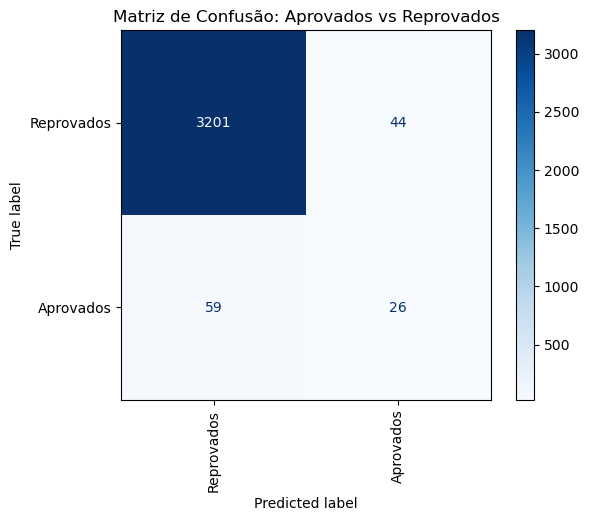

In [52]:
matriz_confusao = confusion_matrix(y_test, y_pred)

labels = ['Reprovados', 'Aprovados']

disp = ConfusionMatrixDisplay(confusion_matrix=matriz_confusao, display_labels=labels)
disp.plot(cmap='Blues', values_format='d', xticks_rotation='vertical')

plt.title('Matriz de Confusão: Aprovados vs Reprovados')
plt.show()


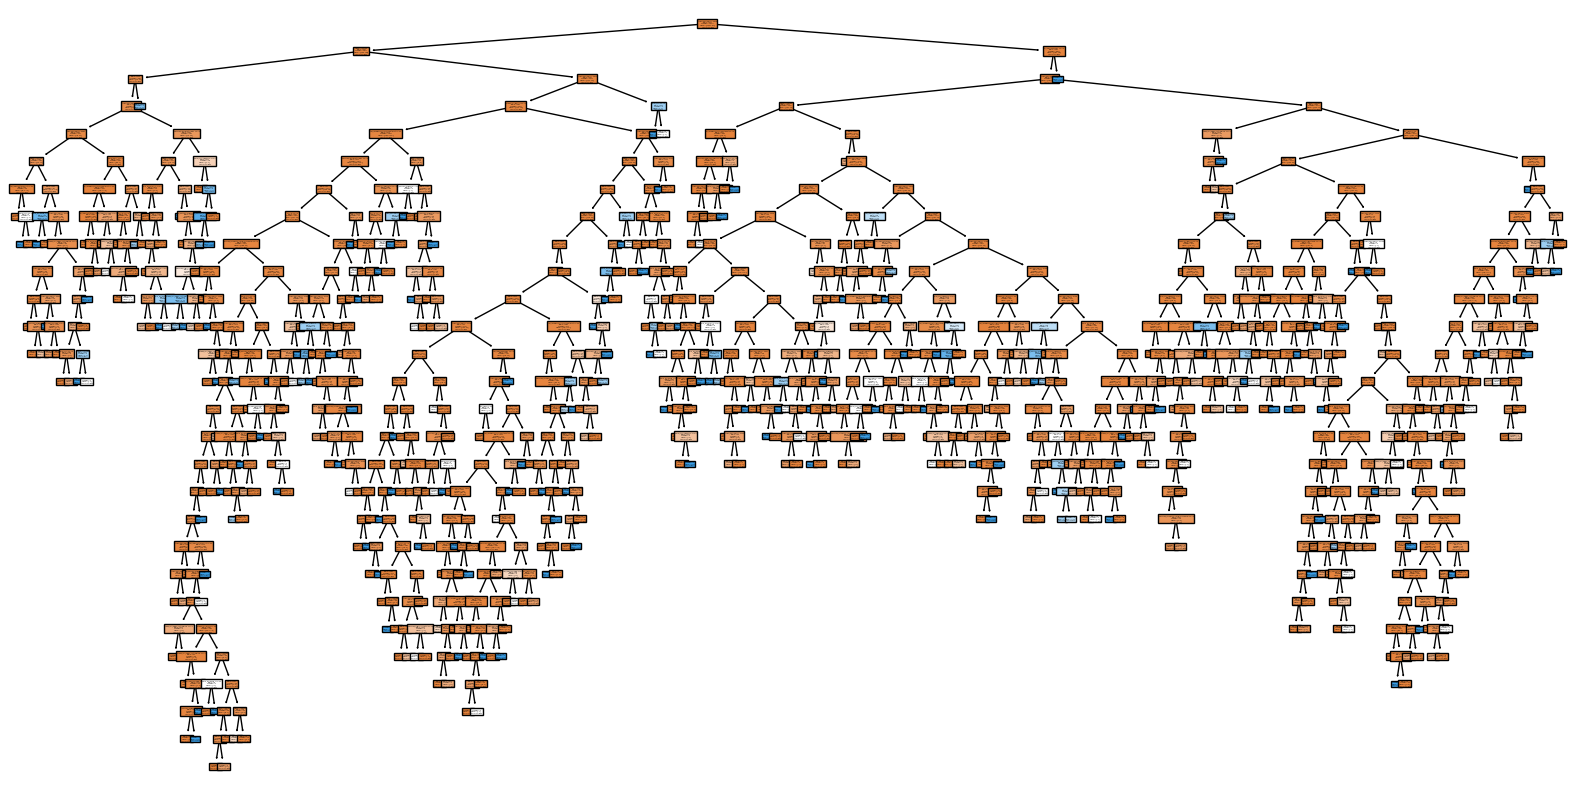

In [53]:
plt.figure(figsize=(20, 10))
plot_tree(tree_clf, filled=True, feature_names=X.columns, class_names=['Não Mau', 'Mau'])
plt.show()

In [54]:
accuracy = accuracy_score(y_test, y_pred)
accuracy

0.9690690690690691

#### 3) Vamos avaliar o modelo na base de testes

1. Classifique a base de teste de acordo com a árvore que você treinou no item 2.
2. Produza a visualização da matriz de confusão para a base de teste.
3. Calcule a acurácia da base de teste. Compare com a acurácia da base de treinamento.
4. Treine uma nova árvore com número mínimo de observações por folha de 5 e máximo de profundidade de 10. Use o random_state = 123. Avalie a matriz de classificação. Observe a distribuição da predição - qual a proporção de proponentes foram classificados como 'maus'?
5. Como ficaria a acurácia se você classificasse todos os contratos como 'bons'?

In [56]:

y_pred_val = tree_clf.predict(X_val)

accuracy_val = accuracy_score(y_val, y_pred_val)

accuracy_val


0.9875875875875876

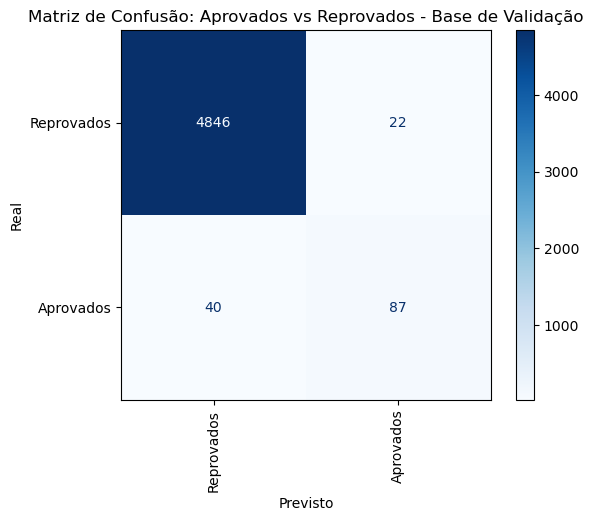

In [58]:
cm_val = confusion_matrix(y_val, y_pred_val)

labels = ['Reprovados', 'Aprovados']


disp = ConfusionMatrixDisplay(confusion_matrix=cm_val, display_labels=labels)
disp.plot(cmap='Blues', values_format='d', xticks_rotation='vertical')

plt.title('Matriz de Confusão: Aprovados vs Reprovados - Base de Validação')
plt.xlabel('Previsto')  
plt.ylabel('Real')      
plt.show()


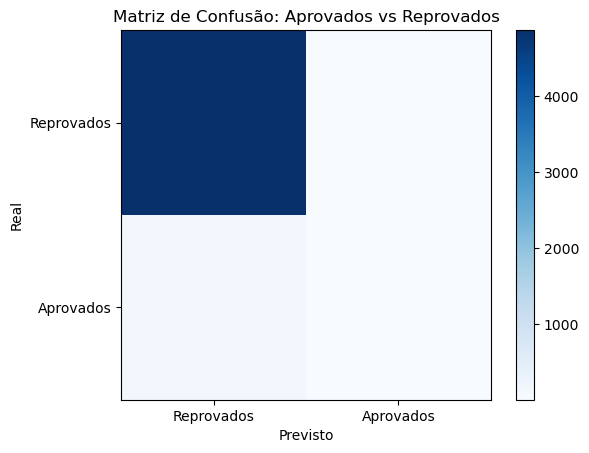

Proporção de proponentes classificados como "maus": 0.2603


In [71]:
arvore_clf_v2 = DecisionTreeClassifier(random_state=123, min_samples_leaf=5, max_depth=10)

arvore_clf_v2.fit(X_train, y_train)

y_pred_val_v2 = arvore_clf_v2.predict(X_val)

cm = confusion_matrix(y_val, y_pred_val_v2)


plt.imshow(cm, interpolation='nearest', cmap='Blues')
plt.title('Matriz de Confusão: Aprovados vs Reprovados')
plt.colorbar()
plt.xticks([0, 1], ['Reprovados', 'Aprovados'])
plt.yticks([0, 1], ['Reprovados', 'Aprovados'])
plt.xlabel('Previsto')
plt.ylabel('Real')
plt.show()

proporcao_maus = (y_pred_val_v2 == 1).mean()*100
print(f'Proporção de proponentes classificados como "maus": {proporcao_maus:.4f}')


In [64]:
y_bons = [0] * len(y_val)

accuracy_bons = accuracy_score(y_val, y_bons)

print(f'Acurácia ao classificar todos os contratos como "bons": {accuracy_bons:.4f}')


Acurácia ao classificar todos os contratos como "bons": 0.9746


In [ ]:
plt.figure(figsize=(20, 10))
plot_tree(tree_clf, filled=True, feature_names=X.columns, class_names=['Não Mau', 'Mau'])
plt.show()